# Installing and importing necessary libraries.

In [303]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress


# Data cleaning and transformation

In [304]:
df_original = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\data\Used_cars\AutoScout24__Dataframe_cleaned.csv", encoding='latin-1')
df = df_original.copy()
df.head()

,Unnamed: 0,Brand,Price,Carrosserie,État,Portes,Kilométrage,Année,Transmission,Carburant,...,Capteurs d'aide au stationnement avant,Climatisation,Climatisation automatique,Start/Stop automatique,Système de navigation,Volant en cuir,Volant multifonctions,Pays,ModelC,Puissance kW
0,0,Renault,115001.0,Utilitaire,Ancêtre,2.0,193176,1987.0,Boîte manuelle,Essence,...,False,False,False,False,False,False,False,luxembourg,R 4 Fourgonnette,22
1,1,Renault,19990.0,Citadine,Occasion,3.0,166775,1989.0,Boîte manuelle,Essence,...,False,False,False,False,False,True,False,luxembourg,R 5 Super 5 GT Turbo,88
2,2,Renault,5990.0,Berline,Occasion,5.0,242000,1991.0,Boîte manuelle,Essence,...,False,False,False,False,False,False,False,luxembourg,R 4 GTL,25
3,3,Renault,16890.0,Berline,Occasion,4.0,288500,1992.0,Boîte manuelle,Essence,...,False,False,False,False,False,True,True,luxembourg,"R 21 2 L. Turbo Quadra, Allrad, Lederausstattung",129
4,4,Renault,1500.0,Autres,Occasion,2.0,165000,2002.0,Boîte manuelle,Essence,...,False,True,False,False,False,False,False,luxembourg,Clio 1.2,43


In [305]:
# Let's see a summary of the dataframe.

def summary(df):
    print(f"Dataset has {df.shape[1]} columns and {df.shape[0]} rows.")
    summary = pd.DataFrame(index=df.columns)
    summary["Unique"] = df.nunique().values
    summary["Missing"] = df.isnull().sum().values
    summary["Missing %"] = df.isnull().sum() / len(df) * 100
    summary["Duplicated"] = df.duplicated().sum()
    summary["Types"] = df.dtypes
    return summary

summary(df)

Dataset has 24 columns and 100659 rows.


,Unique,Missing,Missing %,Duplicated,Types
Unnamed: 0,100659,0,0.0,0,int64
Brand,57,0,0.0,0,object
Price,21802,0,0.0,0,float64
Carrosserie,9,0,0.0,0,object
État,6,0,0.0,0,object
Portes,8,0,0.0,0,float64
Kilométrage,31276,0,0.0,0,int64
Année,92,0,0.0,0,float64
Transmission,3,0,0.0,0,object
Carburant,39,0,0.0,0,object


In [306]:
new_column_names = {
    'Unnamed:0': 'No',
    'Carrosserie': 'Body',
    'État': 'Condition',
    'Portes' : 'Doors',
    "Kilométrage" :"Kilometers",
    "Année" : "Year",
    "Carburant" : "Fuel Type",
    "Couleur extérieure" : "Color",
    "Accoudoir" : "Armrest",
    "Assistant de démarrage en côte" :"Hill Start Assist",
    "Capteurs d'aide au stationnement arrière" : "Rear Parking Sensors",
    "Capteurs d'aide au stationnement avant" : "Front Parking Sensors",
    "Climatisation" :"Air Conditioning",
    "Climatisation automatique" : "AutomatAutomaticic Air Conditioning",
    "Start/Stop automatique" : "Automatic Start/Stop",
    "Système de navigation" : "Navigation System",
    "Volant en cuir" : "Leather Steering Wheel",
    "Volant multifonctions" : "Multifunction Steering Wheel",
    "Pays" : "Country",
    "ModelC" : "Model",
    "Puissance kW" : "Power in kilowatts"
}

df.rename(columns=new_column_names, inplace=True)
df.head()

,Unnamed: 0,Brand,Price,Body,Condition,Doors,Kilometers,Year,Transmission,Fuel Type,...,Front Parking Sensors,Air Conditioning,AutomatAutomaticic Air Conditioning,Automatic Start/Stop,Navigation System,Leather Steering Wheel,Multifunction Steering Wheel,Country,Model,Power in kilowatts
0,0,Renault,115001.0,Utilitaire,Ancêtre,2.0,193176,1987.0,Boîte manuelle,Essence,...,False,False,False,False,False,False,False,luxembourg,R 4 Fourgonnette,22
1,1,Renault,19990.0,Citadine,Occasion,3.0,166775,1989.0,Boîte manuelle,Essence,...,False,False,False,False,False,True,False,luxembourg,R 5 Super 5 GT Turbo,88
2,2,Renault,5990.0,Berline,Occasion,5.0,242000,1991.0,Boîte manuelle,Essence,...,False,False,False,False,False,False,False,luxembourg,R 4 GTL,25
3,3,Renault,16890.0,Berline,Occasion,4.0,288500,1992.0,Boîte manuelle,Essence,...,False,False,False,False,False,True,True,luxembourg,"R 21 2 L. Turbo Quadra, Allrad, Lederausstattung",129
4,4,Renault,1500.0,Autres,Occasion,2.0,165000,2002.0,Boîte manuelle,Essence,...,False,True,False,False,False,False,False,luxembourg,Clio 1.2,43


In [307]:
summary(df)

Dataset has 24 columns and 100659 rows.


,Unique,Missing,Missing %,Duplicated,Types
Unnamed: 0,100659,0,0.0,0,int64
Brand,57,0,0.0,0,object
Price,21802,0,0.0,0,float64
Body,9,0,0.0,0,object
Condition,6,0,0.0,0,object
Doors,8,0,0.0,0,float64
Kilometers,31276,0,0.0,0,int64
Year,92,0,0.0,0,float64
Transmission,3,0,0.0,0,object
Fuel Type,39,0,0.0,0,object


In [308]:
df["MFG date"] = df["Year"].astype(int)

In [309]:
df["Body"].value_counts()

SUV/4x4/Pick-Up    33336
Berline            18428
Coupé              13771
Break              12321
Cabriolet           9079
Monospace           5154
Utilitaire          3370
Citadine            3009
Autres              2191
Name: Body, dtype: int64

In [310]:
# Define a dictionary to map French values to English translations
body_translation = {
    "SUV/4x4/Pick-Up": "SUV/4x4/Pick-Up",
    "Berline": "Sedan",
    "Coupé": "Coupe",
    "Break": "Station Wagon",
    "Cabriolet": "Convertible",
    "Monospace": "Minivan",
    "Utilitaire": "Utility",
    "Citadine": "City Car",
    "Autres": "Other"
}

# Replace the values in the "Body" column using the translation dictionary
df['Body'] = df['Body'].map(body_translation)

# Print the updated value counts
print(df['Body'].value_counts())

SUV/4x4/Pick-Up    33336
Sedan              18428
Coupe              13771
Station Wagon      12321
Convertible         9079
Minivan             5154
Utility             3370
City Car            3009
Other               2191
Name: Body, dtype: int64


In [311]:
df["Color"].value_counts()

Noir      31399
Gris      26342
Blanc     16223
Bleu      10274
Argent     6394
Rouge      4464
Vert       1951
Brun        890
Orange      784
Jaune       758
Beige       512
Bronze      261
Mauve       208
Or          199
Name: Color, dtype: int64

In [312]:
# Define a dictionary to map French values to English translations
color_translation = {
    "Noir": "Black",
    "Gris": "Gray",
    "Blanc": "White",
    "Bleu": "Blue",
    "Argent": "Silver",
    "Rouge": "Red",
    "Vert": "Green",
    "Brun": "Brown",
    "Orange": "Orange",
    "Jaune": "Yellow",
    "Beige": "Beige",
    "Bronze": "Bronze",
    "Mauve": "Mauve",
    "Or": "Gold"
}

# Replace the values in the "Color" column using the translation dictionary
df['Color'] = df['Color'].map(color_translation)

# Print the updated value counts
print(df['Color'].value_counts())

Black     31399
Gray      26342
White     16223
Blue      10274
Silver     6394
Red        4464
Green      1951
Brown       890
Orange      784
Yellow      758
Beige       512
Bronze      261
Mauve       208
Gold        199
Name: Color, dtype: int64


In [313]:
df["Condition"].value_counts()

Occasion              78598
Neuf                   9234
Démonstration          6042
Pré-enregistrement     4160
Voiture récente        1655
Ancêtre                 970
Name: Condition, dtype: int64

In [314]:
# Define a dictionary to map French values to English translations
condition_translation = {
    "Occasion": "Used",
    "Neuf": "New",
    "Démonstration": "Demonstration",
    "Pré-enregistrement": "Pre-registered",
    "Voiture récente": "Recent car",
    "Ancêtre": "Antique"
}

# Replace the values in the "Condition" column using the translation dictionary
df['Condition'] = df['Condition'].map(condition_translation)

# Print the updated value counts
print(df['Condition'].value_counts())

Used              78598
New                9234
Demonstration      6042
Pre-registered     4160
Recent car         1655
Antique             970
Name: Condition, dtype: int64


In [315]:
df["Doors"] = df["Doors"].astype(int)

In [316]:
df["Country"].value_counts()

Germany       21327
NL            17065
France        16820
Italy         15352
Austria       14423
Belgium       13049
luxembourg     2623
Name: Country, dtype: int64

In [317]:
df['Country'] = df['Country'].replace('NL', 'Netherlands')
df['Country'] = df['Country'].replace('luxembourg', 'Luxembourg')

In [318]:
df["HP"] = df["Power in kilowatts"]*1.341
df["HP"].astype(int)

0          29
1         118
2          33
3         172
4          57
         ... 
100654    502
100655    288
100656    325
100657    328
100658    325
Name: HP, Length: 100659, dtype: int32

# EDA

In [319]:
df.head()

,Unnamed: 0,Brand,Price,Body,Condition,Doors,Kilometers,Year,Transmission,Fuel Type,...,AutomatAutomaticic Air Conditioning,Automatic Start/Stop,Navigation System,Leather Steering Wheel,Multifunction Steering Wheel,Country,Model,Power in kilowatts,MFG date,HP
0,0,Renault,115001.0,Utility,Antique,2,193176,1987.0,Boîte manuelle,Essence,...,False,False,False,False,False,Luxembourg,R 4 Fourgonnette,22,1987,29.502
1,1,Renault,19990.0,City Car,Used,3,166775,1989.0,Boîte manuelle,Essence,...,False,False,False,True,False,Luxembourg,R 5 Super 5 GT Turbo,88,1989,118.008
2,2,Renault,5990.0,Sedan,Used,5,242000,1991.0,Boîte manuelle,Essence,...,False,False,False,False,False,Luxembourg,R 4 GTL,25,1991,33.525
3,3,Renault,16890.0,Sedan,Used,4,288500,1992.0,Boîte manuelle,Essence,...,False,False,False,True,True,Luxembourg,"R 21 2 L. Turbo Quadra, Allrad, Lederausstattung",129,1992,172.989
4,4,Renault,1500.0,Other,Used,2,165000,2002.0,Boîte manuelle,Essence,...,False,False,False,False,False,Luxembourg,Clio 1.2,43,2002,57.663


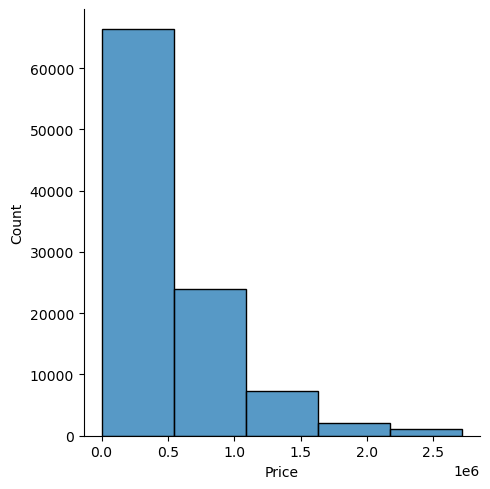

In [320]:
sns.displot(data=df, x="Price", bins = 5)
plt.show()

In [ ]:
# I will focus on the brands that have at least 1000 entries to make my analysis meaningful.

In [366]:
df['Brand'] = df['Brand'].str.strip()
brand_counts = df['Brand'].value_counts()
popular_brands = brand_counts[brand_counts > 1000].index.tolist()
new_df = df[df['Brand'].isin(popular_brands)].copy()
new_df.head()

,Unnamed: 0,Brand,Price,Body,Condition,Doors,Kilometers,Year,Transmission,Fuel Type,...,AutomatAutomaticic Air Conditioning,Automatic Start/Stop,Navigation System,Leather Steering Wheel,Multifunction Steering Wheel,Country,Model,Power in kilowatts,MFG date,HP
0,0,Renault,115001,Utility,Antique,2,193176,1987.0,Boîte manuelle,Essence,...,False,False,False,False,False,Luxembourg,R 4 Fourgonnette,22,1987,29.502
1,1,Renault,19990,City Car,Used,3,166775,1989.0,Boîte manuelle,Essence,...,False,False,False,True,False,Luxembourg,R 5 Super 5 GT Turbo,88,1989,118.008
2,2,Renault,5990,Sedan,Used,5,242000,1991.0,Boîte manuelle,Essence,...,False,False,False,False,False,Luxembourg,R 4 GTL,25,1991,33.525
3,3,Renault,16890,Sedan,Used,4,288500,1992.0,Boîte manuelle,Essence,...,False,False,False,True,True,Luxembourg,"R 21 2 L. Turbo Quadra, Allrad, Lederausstattung",129,1992,172.989
4,4,Renault,1500,Other,Used,2,165000,2002.0,Boîte manuelle,Essence,...,False,False,False,False,False,Luxembourg,Clio 1.2,43,2002,57.663


In [368]:
summary(new_df)

Dataset has 26 columns and 97443 rows.


,Unique,Missing,Missing %,Duplicated,Types
Unnamed: 0,97443,0,0.0,0,int64
Brand,12,0,0.0,0,object
Price,21604,0,0.0,0,int64
Body,9,0,0.0,0,object
Condition,6,0,0.0,0,object
Doors,8,0,0.0,0,int32
Kilometers,30938,0,0.0,0,int64
Year,87,0,0.0,0,float64
Transmission,3,0,0.0,0,object
Fuel Type,39,0,0.0,0,object


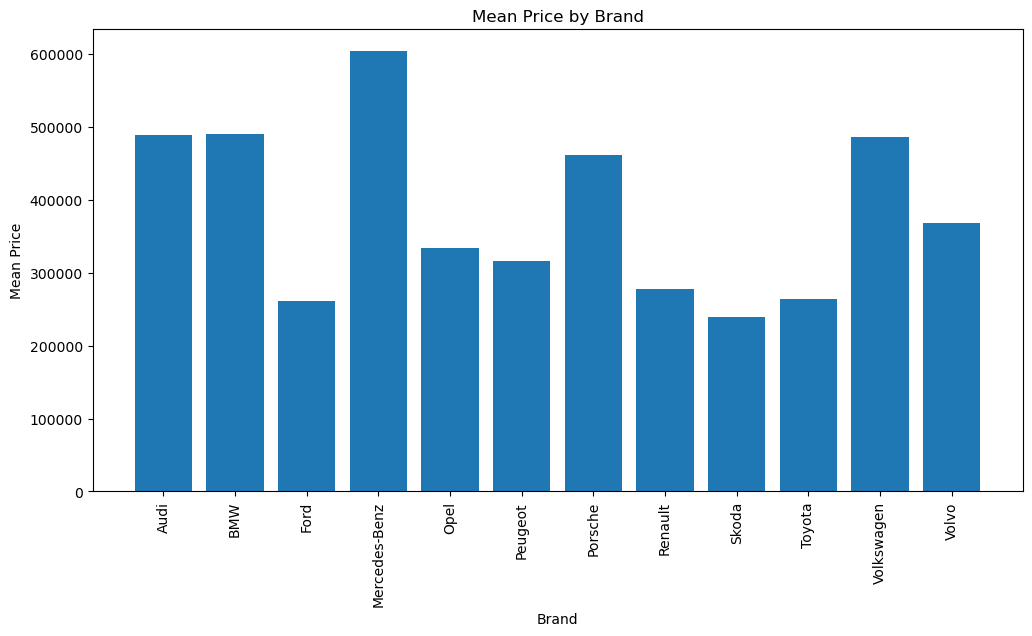

In [370]:
brand_mean_prices = new_df.groupby('Brand')['Price'].mean()
import matplotlib.pyplot as plt

# Plotting the mean prices for each brand
plt.figure(figsize=(12, 6))
plt.bar(brand_mean_prices.index, brand_mean_prices.values)
plt.xlabel('Brand')
plt.ylabel('Mean Price')
plt.title('Mean Price by Brand')
plt.xticks(rotation=90)
plt.show()


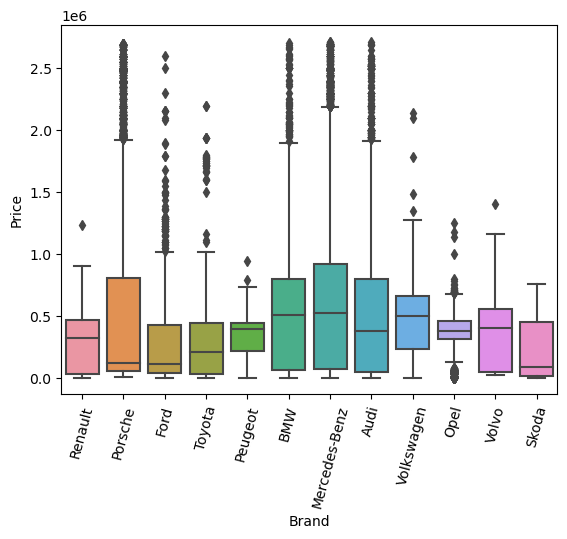

In [374]:
sns.boxplot(data= new_df, x= "Brand", y= "Price")
plt.xticks(rotation= 75)
plt.show()

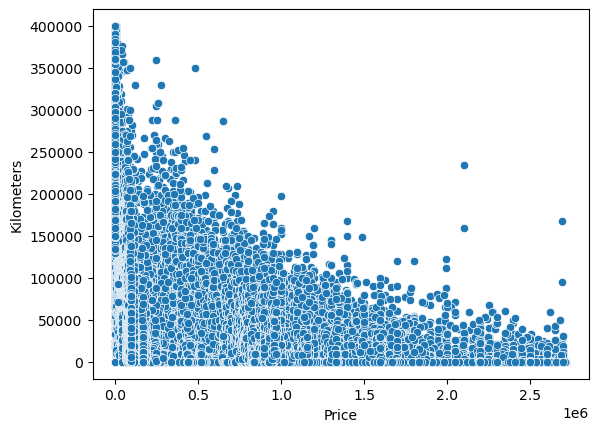

In [377]:
sns.scatterplot(data= new_df, x="Price", y= "Kilometers")
plt.show()